In [17]:
import pandas as pd 
import networkx as nx
from os import listdir
from os.path import isfile, join
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_files(path,sufix):
    """ Returns list of files on specified path with specified sufix
    """
    mypath = path
    return [f for f in listdir(mypath) if isfile(join(mypath, f)) and f.endswith(sufix)]

In [3]:
def is_unidirectional(graph, node1, node2):
    if graph.has_edge(node1, node2) == graph.has_edge(node2, node1):
        return False
    return True

In [4]:
def count_unidirectional_pairs(d_graph):
    edges = d_graph.edges()
    count = 0
    for edge_pair in edges:
        if is_unidirectional(d_graph, edge_pair[0], edge_pair[1]) == True:
            count += 1 
    return count

In [5]:
def fraction_unidirected_pairs(d_graph):
    return round(count_unidirectional_pairs(d_graph)/len(d_graph.edges()),2)

# Fraction of unidirectional links in the network over time (General)

In [6]:
files = get_files("../data/graphs/", "12_dir")

In [7]:
lst = []
for file in files: 
    d_graph = nx.read_gpickle(join("../data/graphs", file))
    lst.append(fraction_unidirected_pairs(d_graph))

In [34]:
# g = sns.pointplot(files, lst)

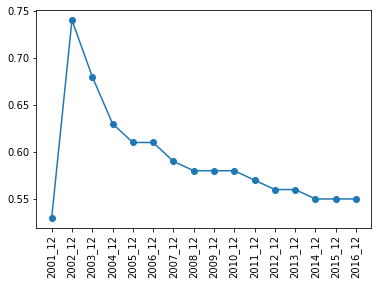

In [36]:
x_label = [f.replace("_dir", "") for f in files]
plt.plot(x_label, lst, marker="o")
plt.xticks(x_label, rotation='vertical')
plt.show()

# Fraction of unidirectional links (Male to Female and Female to Male) in the network over time (General)

In [46]:
# d_graph = nx.read_gpickle(join("../data/graphs", files[15]))

In [10]:
def filter_for_gender(d_graph, gender_from, gender_to):
    edges = d_graph.edges()
#     print(len(edges))
    for edge_pair in edges:
        if d_graph.node[edge_pair[0]]["gender"] != gender_from or d_graph.node[edge_pair[1]]["gender"] != gender_to:
            edges.remove(edge_pair)
#     print(len(edges))
    return edges

In [11]:
def fraction_unidirected_pairs_gender(graph, gender_from, gender_to):
    edges = filter_for_gender(graph, gender_from, gender_to)
    dg = nx.DiGraph(edges)
    return count_unidirectional_pairs(dg)/count_unidirectional_pairs(graph)

In [12]:
def gender_fractions_over_time(files, gender_from, gender_to):
    lst = []
    for file in files: 
        d_graph = nx.read_gpickle(join("../data/graphs", file))
        lst.append(fraction_unidirected_pairs_gender(d_graph, gender_from, gender_to))
    return lst

In [44]:
# fraction_unidirected_pairs_gender(d_graph, "male", "female")

In [45]:
# fraction_unidirected_pairs_gender(d_graph, "female", "male")

In [15]:
m_f_lst = gender_fractions_over_time(files, "male", "female")

In [37]:
f_m_lst = gender_fractions_over_time(files, "female", "male")

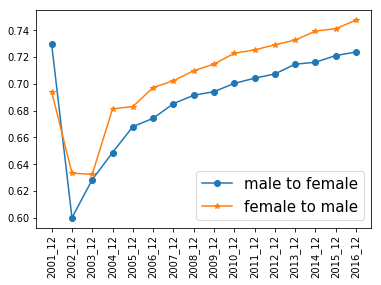

In [43]:
x_label = [f.replace("_dir", "") for f in files]
plt.plot(x_label, m_f_lst, marker="o", label="male to female")
plt.plot(x_label, f_m_lst, marker="*", label="female to male")
plt.xticks(x_label, rotation='vertical')
plt.legend(loc='lower right', fontsize=15)
plt.show()